# Google Data Analytics Capstone Project
## Analysing Data based on FitBit User - Product relationship to provide data-driven recommendations to improve the Bellabeat's product.

# Phase 1 - Ask
## What is the problem that I am trying to solve? 
<li>Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices</li>
<li>Using this information, create high level recommendations for how these trends can inform Bellabeat marketing strategy</li>

## Prepare packages and libraries

In [58]:
library(tidyverse)
library(ggplot2)

# Phase 2 - Prepare
## Import the relevant datasets and bring forth an elementary view of the dataset

In [59]:
activity <- read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_intensity <- read_csv("Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

Parsed with column specification:
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)
Parsed with column specification:
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)
Parsed with column specification:
cols(
  Id = col_double(),
  Date = col_character(),
  WeightKg = col_double(),
  WeightPounds = col_double(),
  Fat = col_double(),
  BMI = col_double(),
  IsManualReport = col_logical(),
  LogId = 

### View Datasets

In [60]:
head(activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [61]:
head(sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [62]:
head(weight)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [63]:
head(hourly_intensity)

Id,ActivityHour,TotalIntensity,AverageIntensity
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


# Phase 3 - Process
## Understand the data and proceed with cleaning the data whenever necessary

In [64]:
glimpse(activity)

Observations: 940
Variables: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396...
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/...
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13...
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, ...
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, ...
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, ...
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, ...
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, ...
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66...
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27,...
$ LightlyActiveMinut

In [65]:
glimpse(sleep)

Observations: 413
Variables: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, ...
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM"...
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430...
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449...


In [66]:
glimpse(weight)

Observations: 67
Variables: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873...
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/1...
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70....
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 15...
$ Fat            <dbl> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, ...
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27....
$ IsManualReport <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRU...
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+...


### Identified that there are some date time formatting issues, proceed to fix it

In [67]:
# Fix date time formatting issues for activity & sleep

# activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

# intensities
hourly_intensity$ActivityHour=as.POSIXct(hourly_intensity$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_intensity$time <- format(hourly_intensity$ActivityHour, format = "%H:%M:%S")
hourly_intensity$date <- format(hourly_intensity$ActivityHour, format = "%m/%d/%y")

In [68]:
# View Changes to confirm success
head(activity)
head(sleep)
head(hourly_intensity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
1503960366,2016-04-12,1,327,346,04/12/16
1503960366,2016-04-13,2,384,407,04/13/16
1503960366,2016-04-15,1,412,442,04/15/16
1503960366,2016-04-16,2,340,367,04/16/16
1503960366,2016-04-17,1,700,712,04/17/16
1503960366,2016-04-19,1,304,320,04/19/16


Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16
1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16
1503960366,2016-04-12 05:00:00,0,0.000000,05:00:00,04/12/16


# Phase 4 - Analyse
## This will be done through summary statistics and exploratory data analysis

In [69]:
# Begin summary statistics
summary(activity)
summary(weight)
summary(sleep)

       Id             ActivityDate                   TotalSteps   
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :    0  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19 00:00:00   1st Qu.: 3790  
 Median :4.445e+09   Median :2016-04-26 00:00:00   Median : 7406  
 Mean   :4.855e+09   Mean   :2016-04-26 06:53:37   Mean   : 7638  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04 00:00:00   3rd Qu.:10727  
 Max.   :8.878e+09   Max.   :2016-05-12 00:00:00   Max.   :36019  
 TotalDistance    TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.490   Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.713   3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :28.030   Max.   :4.9421        

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport      LogId          
 Min.   :22.00   Min.   :21.45   Mode :logical   Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   FALSE:26        1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   TRUE :41        Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                   Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                   3rd Qu.:1.462e+12  
 M

       Id               SleepDay                   TotalSleepRecords
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :1.000    
 1st Qu.:3.977e+09   1st Qu.:2016-04-19 00:00:00   1st Qu.:1.000    
 Median :4.703e+09   Median :2016-04-27 00:00:00   Median :1.000    
 Mean   :5.001e+09   Mean   :2016-04-26 12:40:05   Mean   :1.119    
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04 00:00:00   3rd Qu.:1.000    
 Max.   :8.792e+09   Max.   :2016-05-12 00:00:00   Max.   :3.000    
 TotalMinutesAsleep TotalTimeInBed      date          
 Min.   : 58.0      Min.   : 61.0   Length:413        
 1st Qu.:361.0      1st Qu.:403.0   Class :character  
 Median :433.0      Median :463.0   Mode  :character  
 Mean   :419.5      Mean   :458.6                     
 3rd Qu.:490.0      3rd Qu.:526.0                     
 Max.   :796.0      Max.   :961.0                     

### From the findings above ^ we manage to draw the following insights:
### For sleep: the average total minutes asleep is slightly lesser than the total time in bed, this can be due to the time taken to fall asleep. Hence the insight here is pretty standard and accurate
### For weight: only 8 participants are screened, hence the insights drawn here are not the most accurate and will not provide good readings
### For activity: average sedentary time is 991 mins (around 16 hours) which is not a very optimal amount and should be reduced if possible. Average steps taken is 7638 which is slightly below the recommended amount. Majority of the participants are lightly active 

In [70]:
# Merge data using an inner join by "id"

merge_sleep_activity <- merge(sleep, activity, by=c('Id', 'date'))
head(merge_sleep_activity)


Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


## Exploratory Data Analysis

### <u>Scatter plot of SedentaryMinutes vs Calories</u>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


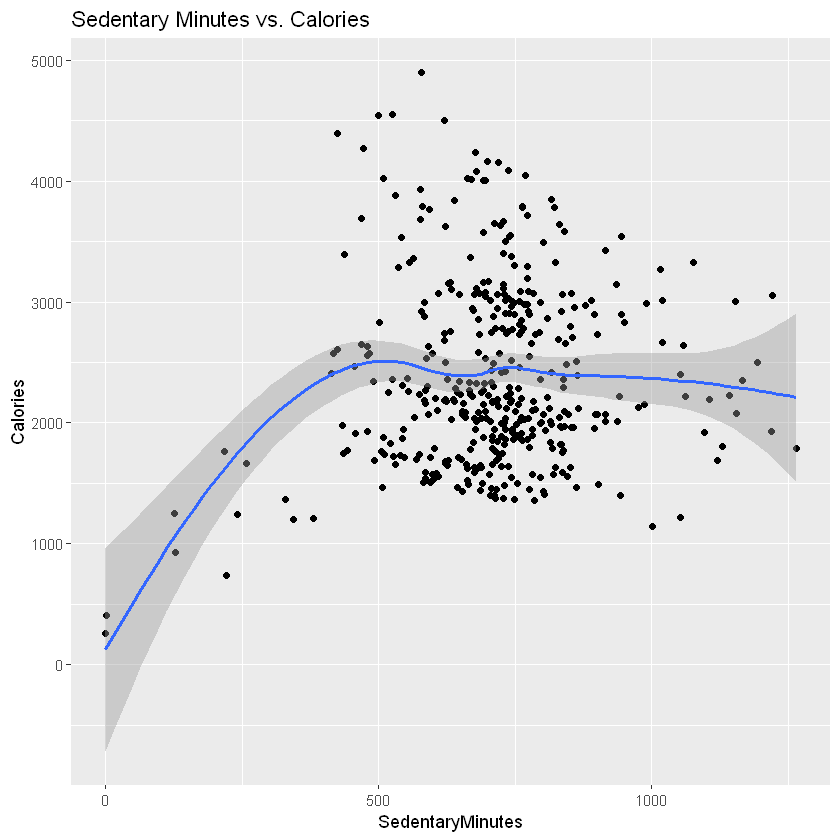

In [71]:
# Exploratory Data Analysis
# Scatter plot SedentaryMinutes vs Calories

ggplot(merge_sleep_activity, aes(x=SedentaryMinutes, y=Calories)) + geom_point() + geom_smooth() + labs(title="Sedentary Minutes vs. Calories")

### Insights: We assume that a person with longer sedentary minutes will require lower calories, the plot shows that the average sedentary minute have a rather extensive range of calorie intake

### <u>Scatter Plot of Total Steps vs Calories</u>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


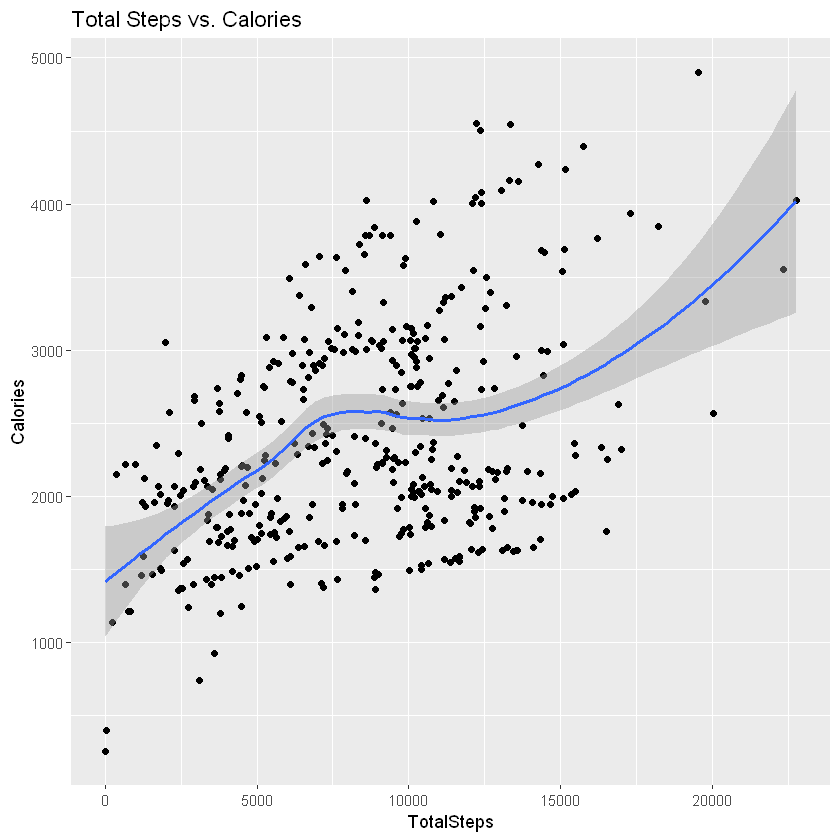

In [72]:
ggplot(merge_sleep_activity, aes(x=TotalSteps, y=Calories)) + geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

### Insights: A rather positive correlation regarding total steps taken and calorie intake. It make sense as with more steps taken, there should be a higher amount of calories intake

### <u>Scatter Plot of Total Minutes Asleep vs Calorie Intake</u>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


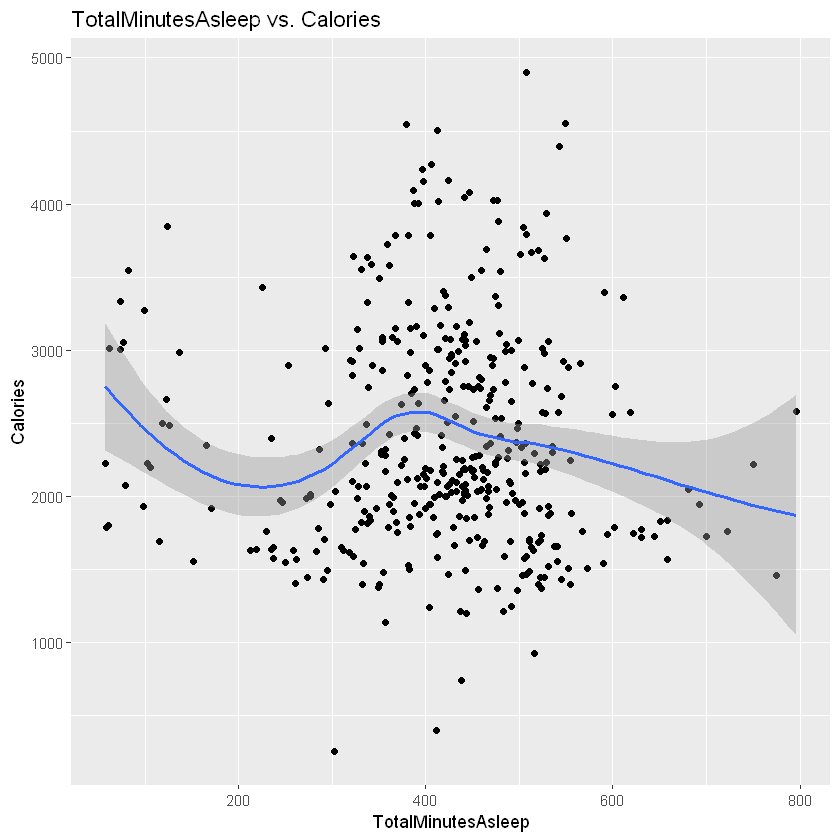

In [73]:
# Scatter Plot
ggplot(merge_sleep_activity, aes(x=TotalMinutesAsleep, y=Calories)) + geom_point() + geom_smooth() + labs(title="TotalMinutesAsleep vs. Calories")

### Insights: With longer amounts of sleep, calorie intake should be lower. Hence there is a negative correlation between sleep and calorie intake

### <u>Scatter Plot of Total Minutes Asleep vs Total Time in Bed</u>

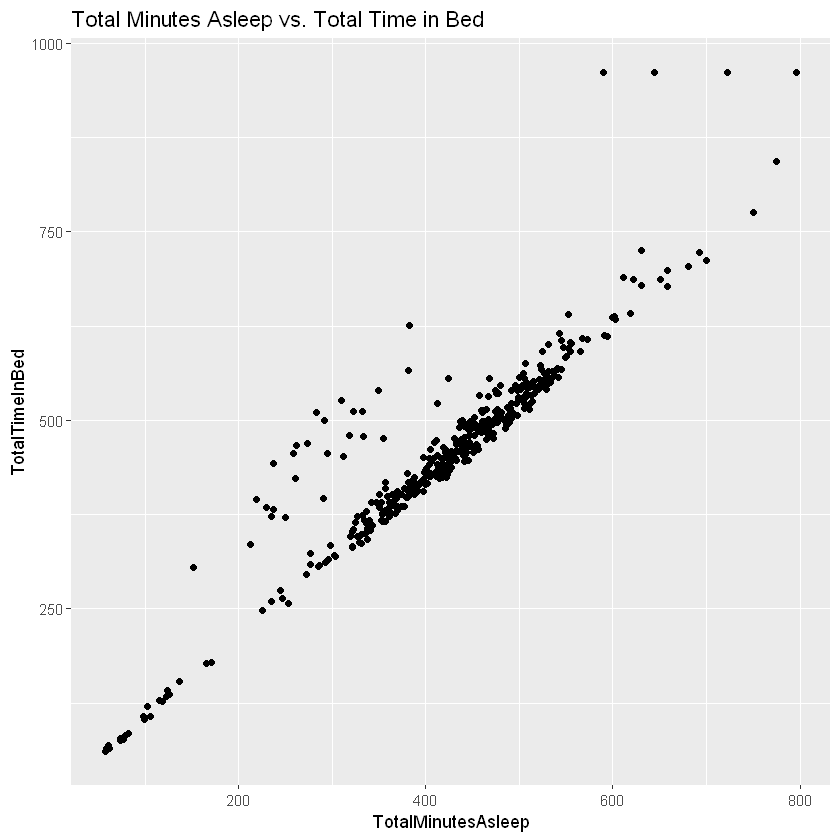

In [74]:
ggplot(data=merge_sleep_activity, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

### Insights: There is a strong positive linear relationship between this two variables. Stating that there are no discrepancies between time in bed vs actual sleep time

### <u>Distribution of Intensity levels</u>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


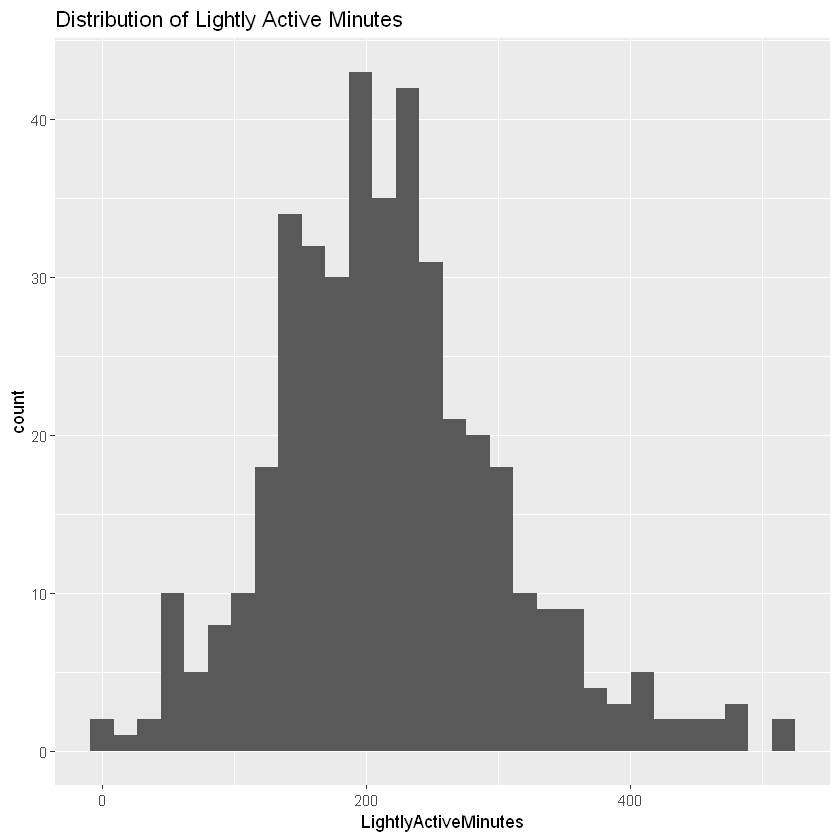

In [75]:
ggplot(data=merge_sleep_activity, aes(LightlyActiveMinutes)) + 
  geom_histogram() + labs(title="Distribution of Lightly Active Minutes")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


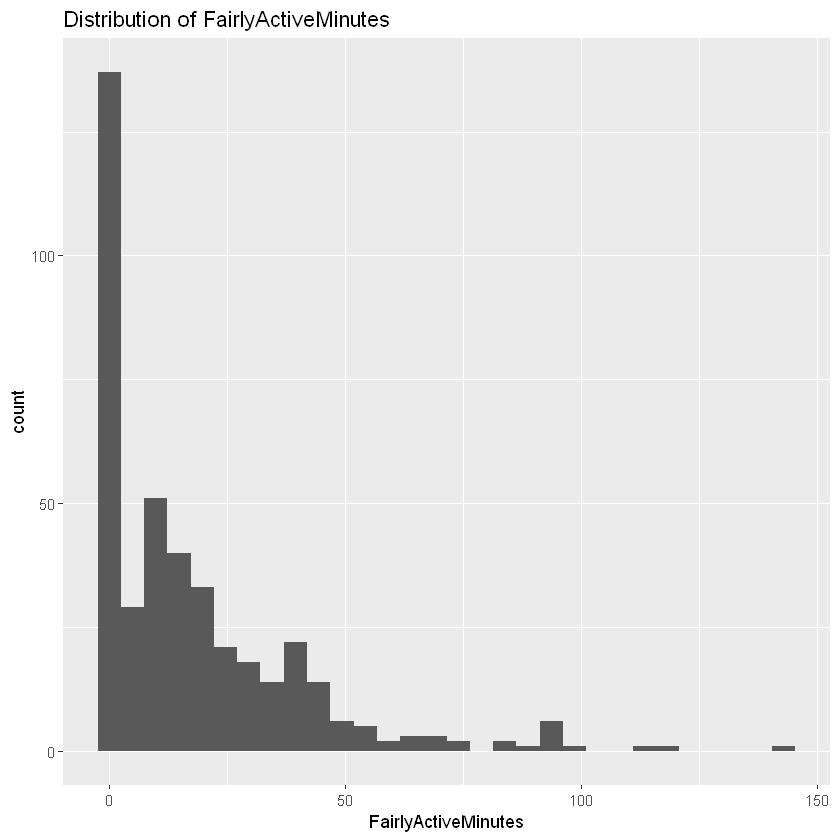

In [76]:
ggplot(data=merge_sleep_activity, aes(FairlyActiveMinutes)) + 
  geom_histogram() + labs(title="Distribution of FairlyActiveMinutes")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


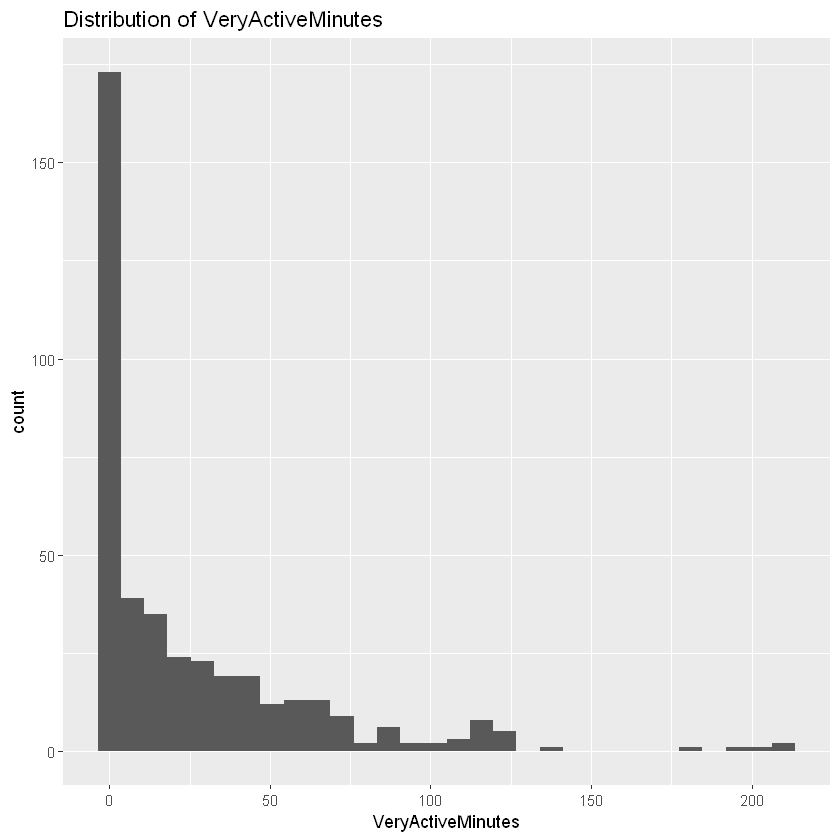

In [77]:
ggplot(data=merge_sleep_activity, aes(VeryActiveMinutes)) + 
  geom_histogram() + labs(title="Distribution of VeryActiveMinutes")

### Insights: Majority of users are lightly active, hence this clearly states that the majority of customers belong to casual users

### <u>Distribution of Sedentary Minutes</u>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


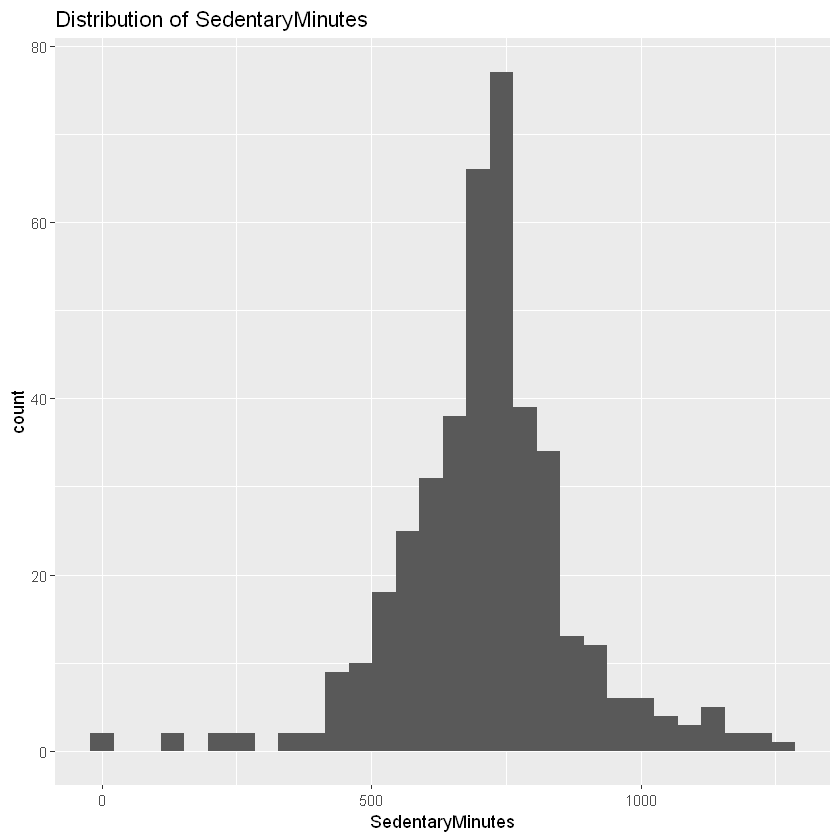

In [78]:
ggplot(data=merge_sleep_activity, aes(SedentaryMinutes)) + 
  geom_histogram() + labs(title="Distribution of SedentaryMinutes")

### Insights: Majority of users have high sedentary minutes level, hence there is a need to reduce this levels based on the healthy recommendation

### <u>Distribution of Avg Total Intensity vs Time</u>

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

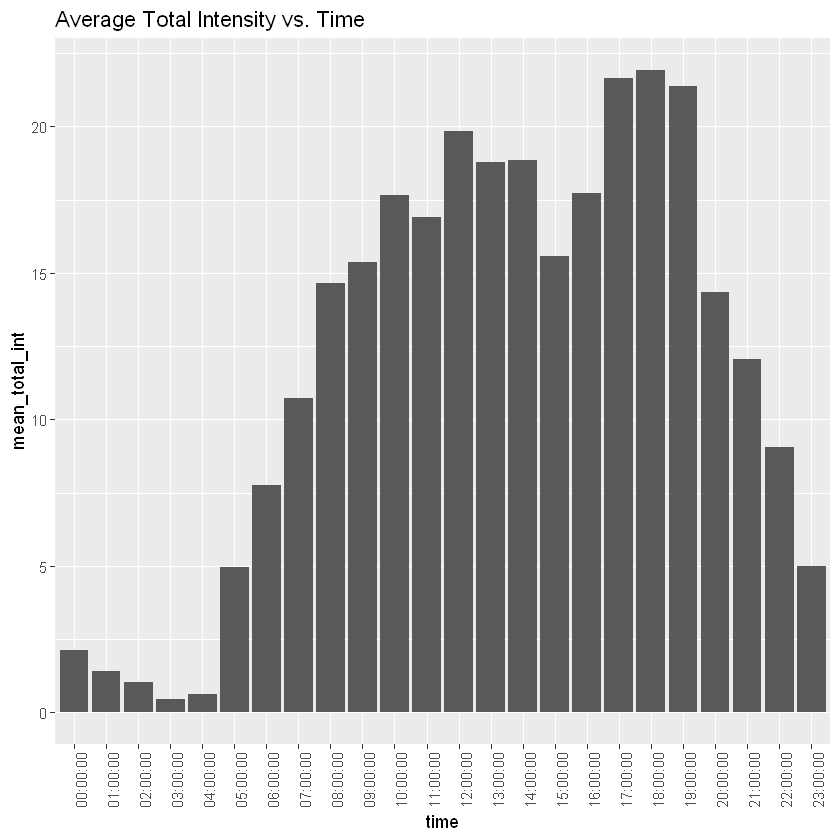

In [79]:
intensity_new <- hourly_intensity %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=intensity_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity") +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

### Insights: From the histogram above, people are the most active during the timings 5pm to 7pm. Hence a notification to recommend people to go for some light activity would be highly effective

# Final Phase - Summarise the findings the provide data-driven recommendations

## Based on the data analyzed, I come up with these recommendations
### <li> Implement a notification system to Remind and Recommend users to go for some light activity during the timings between 5pm to 7pm as that is timing where majority of people are active </li>
### <li>Majority of users are lightly active, hence targeting more towards the casual fitness demographic may bring in more sales</li>
### <li>Since the time asleep and time on the bed has minor discrepancies, Bellabeat can implement a notification system for users to improve their sleep habits</li>
### <li>Sedentary Minutes for majority of users are excessive, Bellabeat can recommend users to reduce this by providing notifications to stay active and maybe include bits of pop ups about why high sedentary minutes in life is not good</li>
### <li>The steps per day is relatively below the healthy recommendations. Bellabeat can use a notification system that informs user to increase their steps for the day if it is not within the appropriate threshold</li>